# No-show dataset

In [1]:
# import the packages 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('no-show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# get the describtion of the numerical columns in the data frame
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# get the size of the dataframe
print(df.shape)
print()
x = df.shape[0] # this is the total number of data entries in the dataset
print("Number of entreis is :", str(x))
print("Number of columns is :", str(df.shape[1]))

(110527, 14)

Number of entreis is : 110527
Number of columns is : 14


In [5]:
# understand the data type od entries in each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
# get the total number of nun-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Outcome: df does not have null values but the datatypes needs to be adjusted in the Data Cleaning process 


In [7]:
#Explore the data type of the 'ScheduledDay' column as it should be a date type
type(df['ScheduledDay'][0])

str

In [8]:
#understand the data though knowledge of how many unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

# Questions that could arise from the dataset are:
### How many people recieved sms and did not attend?
### What are the age groups did not attend their appointent?
### What is the distribtion of no shows between different age groups?
### What is the distribtion of no shows between genders?
### Does the period between the scheduled day and the appointmnet day impact the no shows?



## Data Cleaning 

#### Adjust datatypes

In [9]:
# check for dublicated rows
df.duplicated().sum()

0

#### Outcome: the dataframe does not has any dublicated rows

In [10]:
# correct data types for 'ScheduledDay', 'AppointmentDay' columns to a date formate 
# the other columns have teh right data type with several categorical columns represented by numerical values 0 and 1

df['PatientId'] = df['PatientId'].astype('int64')
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64')
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64')


In [11]:
# check the data types of the dataframe
df.dtypes

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

#### Format column names (lower case letters)

In [12]:
# convert column names to lower case letters
df.columns = map(str.lower, df.columns)

In [13]:
# confirm the names of the columns as lower case letters
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:
# Adjust the column names
df.rename(columns={"patientid": "patient_id","appointmentid": "appointment_id",
                  "scheduledday": "scheduled_day",
                  "appointmentday": "appointment_day",
                  "no-show": "no_show"}, inplace = True)

In [15]:
# confirm the names of the columns after adjustments 
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### What age group experienced the most no show?

In [16]:
# construct a dataframe with the columns of interest
# for example, the patient ID and the date are not required at this stage
dfc = df[['gender','age', 'neighbourhood', 'scholarship',
          'diabetes', 'alcoholism', 'handcap',
             'hipertension','sms_received', 'no_show']]

In [17]:
# get to know the size of each category in each column 
# like how many M and F in the Gender column and so on 
for col in dfc:
    print(col)
    print(df[col].value_counts()/x)
    print()
    continue
    

gender
F    0.649977
M    0.350023
Name: gender, dtype: float64

age
 0      0.032019
 1      0.020565
 52     0.015797
 49     0.014947
 53     0.014938
 56     0.014793
 38     0.014738
 59     0.014693
 2      0.014639
 50     0.014594
 57     0.014503
 36     0.014295
 51     0.014178
 19     0.013978
 39     0.013897
 37     0.013870
 54     0.013843
 34     0.013807
 33     0.013788
 30     0.013761
 6      0.013761
 3      0.013689
 17     0.013653
 32     0.013617
 5      0.013472
 44     0.013454
 18     0.013454
 58     0.013291
 46     0.013209
 45     0.013146
          ...   
 74     0.005447
 76     0.005166
 75     0.004922
 78     0.004895
 77     0.004768
 80     0.004623
 81     0.003927
 82     0.003547
 79     0.003529
 84     0.002814
 83     0.002533
 85     0.002488
 86     0.002352
 87     0.001665
 89     0.001565
 88     0.001140
 90     0.000986
 92     0.000778
 91     0.000597
 93     0.000480
 94     0.000299
 95     0.000217
 96     0.000154
 97     0.000

In [18]:
# get to know how many of the patients did not attend the appointment 
n_show = pd.DataFrame(df['no_show'].value_counts())
n_show.head()


,no_show
No,88208
Yes,22319


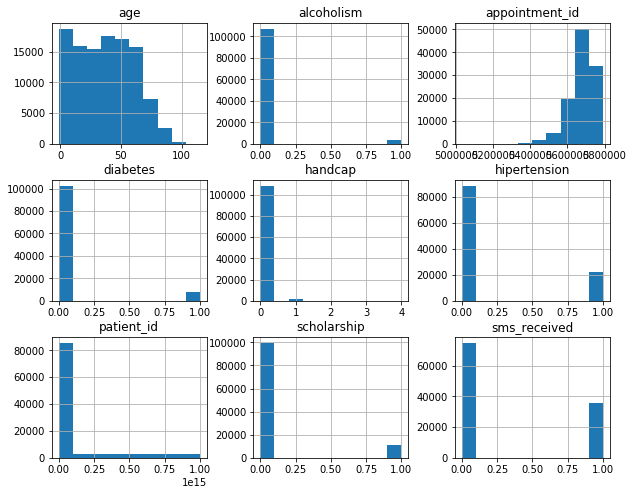

In [19]:
# plot histograms to see teh distribution of numerical data columns
df.hist(figsize = (10,8));

In [20]:
# filter
df_male = df.query('gender == "M"')
df_female = df.query('gender == "F"' )

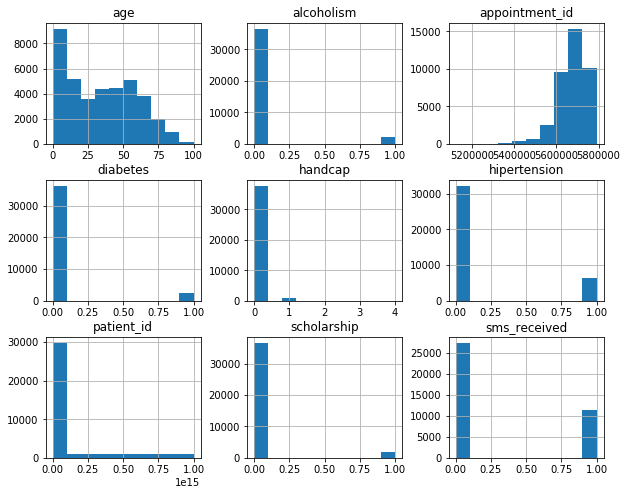

In [21]:
df_male.hist(figsize = (10,8));

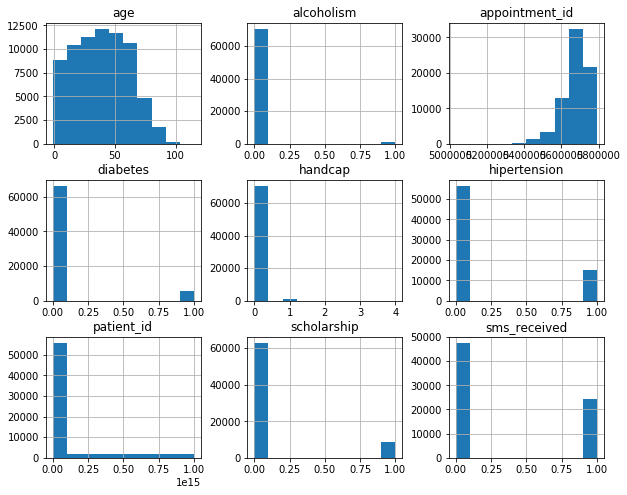

In [22]:
df_female.hist(figsize = (10,8));

In [23]:
# total number of male entries
x_m = df_male.shape[0]
print('total number of males :', x_m)

total number of males : 38687


In [24]:
# total number of female entries
x_f = df_female.shape[0]
print('total number of females :', x_f)

total number of females : 71840


In [25]:
# average age of males and females
print('average age of male patients is :', df_male['age'].mean())
print('average age of male patients is :',df_female['age'].mean())


average age of male patients is : 33.73686251195492
average age of male patients is : 38.89398663697105


### Does the no show gender related?

In [26]:
# fraction of male patients attended the appointmnet
df_male['no_show'].value_counts()/x_m

No     0.800321
Yes    0.199679
Name: no_show, dtype: float64

In [27]:
# fraction of male patients attended the appointmnet
df_female['no_show'].value_counts()/x_f

No     0.796854
Yes    0.203146
Name: no_show, dtype: float64

C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


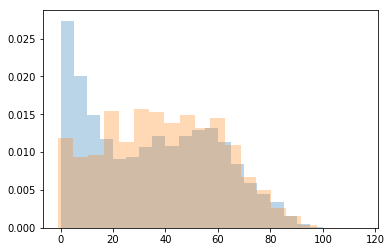

In [28]:
# plot the destibution of the age between males and females in the dataset

dhist_gend = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=20)

plt.hist(df_male['age'], **dhist_gend);
plt.hist(df_female['age'], **dhist_gend);

### Outcome: around 80% of males and 80% of females attended their appointmnet.
The male patients are younger than the demale patients with average age of 33.7 years for males and 38.9 for females

### handcap effect

In [39]:
# define a function to split the data frame based on a desease or condition and investigate how it impacts\n 
# attending or not attending the appointmnet, then it plots a double histograme to compare the distribution of age
def split_and_plot(column):
    df_yes = df[df[column]== 1]
    df_no =df[df[column]== 0]
    dhist_dia = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=20)
    plt.hist(df_yes['age'], **dhist_dia);
    plt.hist(df_no['age'], **dhist_dia);
    plt.title('Age destiburion in those who are/ or have' + ' ' + column +' - in blue - ' + 'and those who are not')
    plt.xlabel('Age')
    # value count of the yes answer to the now_show 
    vcy = df_yes['no_show'].value_counts()/x*100
    # value count of the no answer to the now_show 
    vcn = df_no['no_show'].value_counts()/x*100
    print("No_show statistics in those who suffer", str(column))
    print(vcy)
    print('')
    print("No_show statistics in those who does not suffer", str(column))
    print(vcn)

No_show statistics in those who suffer handcap
No     1.516372
Yes    0.331141
Name: no_show, dtype: float64

No_show statistics in those who does not suffer handcap
No     78.147421
Yes    19.825020
Name: no_show, dtype: float64


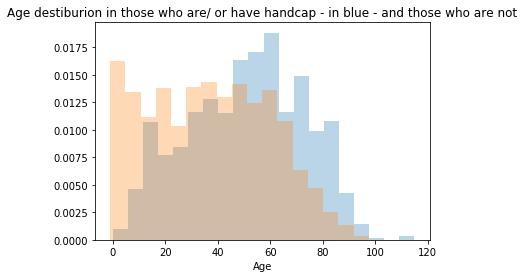

In [40]:
split_and_plot('handcap')

###  Diabetes effect 

No_show statistics in those who suffer diabetes
No     5.892678
Yes    1.293802
Name: no_show, dtype: float64

No_show statistics in those who does not suffer diabetes
No     73.914066
Yes    18.899454
Name: no_show, dtype: float64


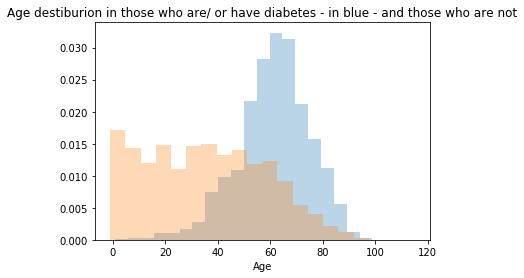

In [41]:
split_and_plot('diabetes')

#### 1.2% of the patients did not attend their appointment and had diabetes
18.8% of the patients did not attend their appoint and did not have diabetes 

### hipertension effect

No_show statistics in those who suffer hipertension
No     16.311851
Yes     3.412741
Name: no_show, dtype: float64

No_show statistics in those who does not suffer hipertension
No     63.494893
Yes    16.780515
Name: no_show, dtype: float64


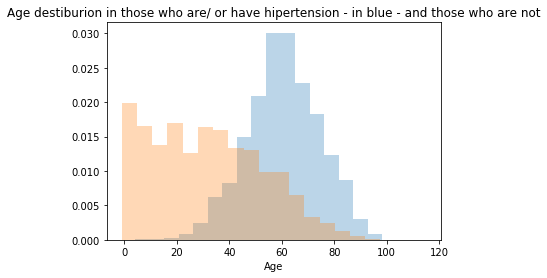

In [42]:
split_and_plot('hipertension')

#### 16% of those who did not attend their appointmnet does not suffer hipertension
only 3% did not attend their appointmnet and suffer hipertension

### alcoholism effecct

No_show statistics in those who suffer alcoholism
No     2.427461
Yes    0.612520
Name: no_show, dtype: float64

No_show statistics in those who does not suffer alcoholism
No     77.379283
Yes    19.580736
Name: no_show, dtype: float64


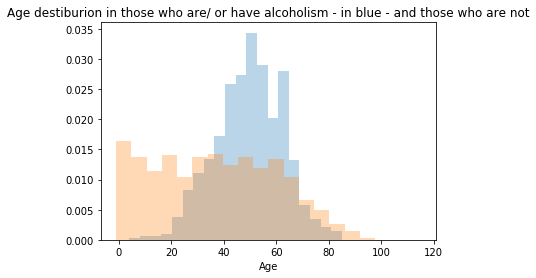

In [43]:
split_and_plot('alcoholism')

#### less than 1% of the patients did not attend their appointmnet and suffer alcoholism
tha majority suffering alcoholism are of older age than those who does not suffer alcoholism

### sms_received effect

No_show statistics in those who suffer sms_received
No     23.250427
Yes     8.852136
Name: no_show, dtype: float64

No_show statistics in those who does not suffer sms_received
No     56.556317
Yes    11.341120
Name: no_show, dtype: float64


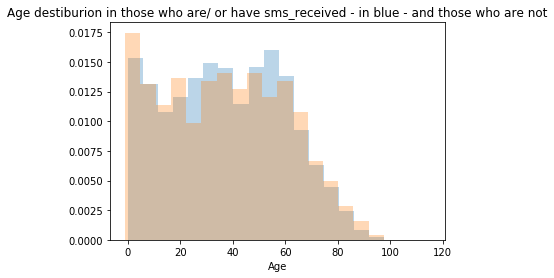

In [44]:
split_and_plot('sms_received')

#### 8% got the sms and did not attend their appointmnet while 11% did not get the sms and did not attend their appointmnet 
The age destribution between those attended and those did not is very similar 
It can be colcluded that the sms did not have high impact

### Location effect

In [55]:
# get the data of the dataframe where patient did not attend their appointmnet
df_nsy = df.query('no_show == "Yes"')
# get the data of the dataframe where patient did attend their appointmnet
df_nsn = df.query('no_show == "No"')

In [46]:
df_nsy['neighbourhood'].value_counts()/x*100

JARDIM CAMBURI                 1.325468
MARIA ORTIZ                    1.102898
ITARARÉ                        0.835090
RESISTÊNCIA                    0.819709
CENTRO                         0.636044
JESUS DE NAZARETH              0.629710
JARDIM DA PENHA                0.570901
CARATOÍRA                      0.534711
TABUAZEIRO                     0.518425
BONFIM                         0.497616
ILHA DO PRÍNCIPE               0.481330
ANDORINHAS                     0.471378
SÃO PEDRO                      0.465949
SANTO ANDRÉ                    0.459616
SANTA MARTHA                   0.448759
SANTO ANTÔNIO                  0.437902
ROMÃO                          0.428854
GURIGICA                       0.412569
JABOUR                         0.408045
DA PENHA                       0.388140
SÃO JOSÉ                       0.387236
MARUÍPE                        0.383617
NOVA PALESTINA                 0.363712
BELA VISTA                     0.347426
SANTOS DUMONT                  0.333855


In [47]:
# get insights on locations - are there any areas have very high density if patinets?
df_nsn['neighbourhood'].value_counts()/x*100

JARDIM CAMBURI         5.656536
MARIA ORTIZ            4.149212
RESISTÊNCIA            3.189266
JARDIM DA PENHA        2.936839
SANTA MARTHA           2.384033
CENTRO                 2.380414
ITARARÉ                2.344224
TABUAZEIRO             2.315271
SANTO ANTÔNIO          2.046559
BONFIM                 2.011273
JESUS DE NAZARETH      1.951559
SANTO ANDRÉ            1.866512
JABOUR                 1.861988
CARATOÍRA              1.785989
SÃO PEDRO              1.748894
NOVA PALESTINA         1.684656
DA PENHA               1.617704
ANDORINHAS             1.575181
ROMÃO                  1.575181
ILHA DO PRÍNCIPE       1.568847
GURIGICA               1.413229
SÃO JOSÉ               1.401468
FORTE SÃO JOÃO         1.396039
ILHA DE SANTA MARIA    1.378849
BELA VISTA             1.377944
MARUÍPE                1.337230
SÃO CRISTÓVÃO          1.332706
REDENÇÃO               1.156279
JOANA D´ARC            1.057660
SÃO BENEDITO           1.042279
                         ...   
DO CABRA

In [48]:
#Difference between yes and no values to each neighborhood
df_diff_loc = df_nsy['neighbourhood'].value_counts()/x*100 - df_nsn['neighbourhood'].value_counts()/x*100

In [49]:
df_diff_loc >0

AEROPORTO              False
ANDORINHAS             False
ANTÔNIO HONÓRIO        False
ARIOVALDO FAVALESSA    False
BARRO VERMELHO         False
BELA VISTA             False
BENTO FERREIRA         False
BOA VISTA              False
BONFIM                 False
CARATOÍRA              False
CENTRO                 False
COMDUSA                False
CONQUISTA              False
CONSOLAÇÃO             False
CRUZAMENTO             False
DA PENHA               False
DE LOURDES             False
DO CABRAL              False
DO MOSCOSO             False
DO QUADRO              False
ENSEADA DO SUÁ         False
ESTRELINHA             False
FONTE GRANDE           False
FORTE SÃO JOÃO         False
FRADINHOS              False
GOIABEIRAS             False
GRANDE VITÓRIA         False
GURIGICA               False
HORTO                  False
ILHA DAS CAIEIRAS      False
                       ...  
PARQUE INDUSTRIAL      False
PARQUE MOSCOSO         False
PIEDADE                False
PONTAL DE CAMB

In [50]:
(df_diff_loc < 0).sum()

79

### Differnece between the scehdule data time and the appointment itself

In [53]:
# define a column to represent the difference ebtween the scheduled_day and the appointment_day
df_nsy_time = df_nsy['scheduled_day'] - df_nsy['appointment_day']

In [54]:
# get ststistics on the difference column defined above
df_nsy_time.describe()

count                        22319
mean     -16 days +15:42:25.001120
std        16 days 14:24:19.715831
min            -179 days +10:40:59
25%             -23 days +08:15:27
50%             -11 days +16:17:29
75%              -4 days +13:12:35
max                6 days 13:49:20
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

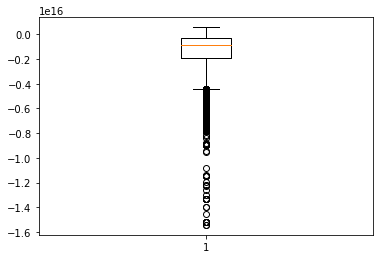

In [59]:
# get the statistics on the difference column between dates when the patient did not attend their appointment 

plt.boxplot(df_nsy_time);
plt.show

In [57]:
df_nsn_time = df_nsn['scheduled_day'] - df_nsn['appointment_day']

In [58]:
# get the statistics on the difference column between dates when the patient attend their appointment 
df_nsn_time.describe()

count                       88208
mean     -9 days +17:03:13.775405
std       14 days 12:57:11.876227
min           -179 days +10:42:42
25%            -12 days +08:34:05
50%             -2 days +09:03:16
75%        0 days 09:00:59.750000
max               0 days 20:44:54
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

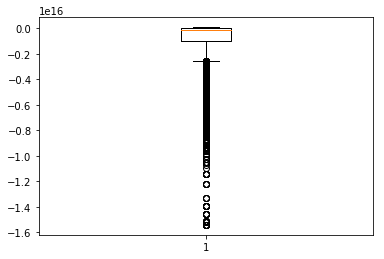

In [56]:
plt.boxplot(df_nsn_time);
plt.show

### The longer the time frame between the schedule date and the appointmnet date the more the no_shows

### Limitations
The percentage of people having cronic deseases like diabetes, addected to alcohol and are handcaped are vey few. 
So it is difficult to judge the impact of these cases on attending or not attending the appointment 
Unlike hipertension that represent 19% of the data.

Location information is not useful as we do not know the closenes of these locations to the hospital where patients attend their appointment

<a id='conclusions'></a>
## Conclusions



### 1-No impact on the no-show related to gender with value of "no" is 80% in both genders

### 2-Most locations has more percentage of people went to the appointment than did not go

### 3-The longer the time frame between the schedule date and the appointmnet date the more the no_shows

### 4-The message has a minor impact on making people attend the appointmnet. 56% did not get a message and attended the appointment

### 5-The percentage of people with cronic deseases and did not attend is very minor

### 6- The percentage of young and old people missed the appointment is the same considering the number of people in the sample